In [1]:
# conda update conda

In [2]:
# conda install anaconda=VersionNumber

In [3]:
# pip install tensorflow

In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random as rd
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import collections
import sklearn.naive_bayes
import sklearn.model_selection

np.set_printoptions(suppress=True)
np.set_printoptions(threshold=10)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("bigtrain.csv")
df = df[["DATE", "V2Locations", "V2Organizations", "V2Tone", "V2Themes"]]

In [6]:
len(df)

52000

# Themes to a sentence

In [7]:
import re
#  All lower case
def to_lower(string):
    result = string.lower()
    return result

In [8]:
themes = df['V2Themes']
themes = themes.apply(to_lower)

# Clean Themes
# Remove digits
themes= themes.str.replace('\d+', '')

# Remove comma
themes= themes.str.replace(',', '')

# Remove typo __ by replacing with _
themes = themes.str.replace("__", "_")
    
# remove taxonomy Labels
themes = themes.str.replace("tax_","")
themes = themes.str.replace("eco_","")
themes = themes.str.replace("env_","")
themes = themes.str.replace("wb_", "")
themes = themes.str.replace("fncact_", "")
themes = themes.str.replace("epu_", "")
themes = themes.str.replace("cats_", "")
themes = themes.str.replace("soc_", "")
themes = themes.str.replace("pointsofinterest_", "")
themes = themes.str.replace("slfid_", "")
themes = themes.str.replace("self_identified_", "")
themes = themes.str.replace("general_", "")
themes = themes.str.replace("ungp_", "")
themes = themes.str.replace("uspec_", "")
themes = themes.str.replace("econ_", "")

# remove crisislex_ standing for crisislex taxonomy
themes = themes.str.replace("crisislex_c_","crisislex_")
themes = themes.str.replace("crisislex_o_","crisislex_")
themes = themes.str.replace("crisislex_t_","crisislex_")
themes = themes.str.replace("crisislex_","crisislex_")
themes = themes.str.replace("crisislex_","")
themes = themes.str.replace("crisislexrec_","")

# typo in some data where ethnicity is not fully typed
themes = themes.str.replace("eth_", "ethnicity_")
themes = themes.str.replace("rel_", "religion_")
themes = themes.str.replace("mil_", "military_")

# 3d printing theme
themes = themes.str.replace("_d_", "3d_")

<ipython-input-8-220ea5c149a0>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  themes= themes.str.replace('\d+', '')


In [9]:
# Make the clean themes separated by semi-colon like a long sentence
themes = themes.str.replace(";"," ")
themes = themes.str.replace("_"," ")

print(themes[:1])

0    updatessympathy crisislexrec vulnerable groups...
Name: V2Themes, dtype: object


In [10]:
# Tokenize Words
import nltk
from nltk.tokenize import word_tokenize

themes = themes.apply(word_tokenize)
print(themes[:5])

0    [updatessympathy, crisislexrec, vulnerable, gr...
1    [worldmammals, horse, worldmammals, horse, wor...
2    [ideology, stockmarket, stockmarket, stockmark...
3    [gold, gold, gold, gold, gold, gold, energy, a...
4    [deputy, deputy, candidates, executive, media,...
Name: V2Themes, dtype: object


In [11]:
# Remove stopwords
from nltk.corpus import stopwords
stop = stopwords.words('english')

themes = themes.apply(lambda x: [word for word in x if word not in (stop)])
print(themes[:5])

0    [updatessympathy, crisislexrec, vulnerable, gr...
1    [worldmammals, horse, worldmammals, horse, wor...
2    [ideology, stockmarket, stockmarket, stockmark...
3    [gold, gold, gold, gold, gold, gold, energy, e...
4    [deputy, deputy, candidates, executive, media,...
Name: V2Themes, dtype: object


In [12]:
# Simplify words like convert everything to first person, etc.
# nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 

themes = themes.apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
print(themes[:5])

0    [updatessympathy, crisislexrec, vulnerable, gr...
1    [worldmammals, horse, worldmammals, horse, wor...
2    [ideology, stockmarket, stockmarket, stockmark...
3    [gold, gold, gold, gold, gold, gold, energy, e...
4    [deputy, deputy, candidates, executive, media,...
Name: V2Themes, dtype: object


In [13]:
# Remove words with less than 3 letters (Hopefully will remove taxonomy related words)

themes = themes.apply(lambda x: [word for word in x if len(word) > 3])
print(themes[:5])

0    [updatessympathy, crisislexrec, vulnerable, gr...
1    [worldmammals, horse, worldmammals, horse, wor...
2    [ideology, stockmarket, stockmarket, stockmark...
3    [gold, gold, gold, gold, gold, gold, energy, e...
4    [deputy, deputy, candidates, executive, media,...
Name: V2Themes, dtype: object


# Formulate a text (or news article)

In [14]:
detokenized_news = []
for i in range(len(themes)):
    t = ' '.join(themes[i])
    detokenized_news.append(t)

news = detokenized_news

In [15]:
news[:5]

['updatessympathy crisislexrec vulnerable group social inclusion orphan social development private sector development business climate inspections license permit business environment natural disaster natural disaster',
 'worldmammals horse worldmammals horse worldmammals horse worldmammals horse worldmammals horse worldmammals horse worldmammals horse worldmammals horse worldmammals horse worldmammals horse worldmammals horse worldmammals horse worldmammals horse media media media media media media reporter reporter reporter reporter reporter reporter news reporter news reporter news reporter news reporter news reporter news reporter manmade disaster imply price price price price digital government broadcast media information communication technologies mine policy policy policy policy house price house price house price house price house price stockmarket stockmarket stockmarket stockmarket chief entrepreneurship entrepreneurship entrepreneurship entrepreneurship entrepreneurship entre

In [16]:
import sklearn.feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000)
X = vectorizer.fit_transform(news)
X.shape

(52000, 1000)

# Tokenizer

In [17]:
# Hot-vectors
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(news)

Using TensorFlow backend.


In [18]:
# pip install keras

In [19]:
# pip uninstall keras

In [20]:
# pip install Keras==2.2.4

In [21]:
import keras
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing import sequence
from tensorflow.python.keras.models import Sequential, Model
from tensorflow.python.keras.layers import SimpleRNN, Dense, Embedding, LSTM, Flatten, Dropout, Input, Conv1D, MaxPooling1D, Bidirectional, GlobalMaxPool1D
from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.python.keras import backend as K
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [22]:
sequences = tokenizer.texts_to_sequences(news)
print(len(sequences[0]))
print(sequences[0])

23
[247, 70, 1131, 456, 7, 671, 1155, 7, 38, 81, 13, 38, 79, 116, 137, 136, 134, 79, 95, 58, 22, 58, 22]


In [23]:
word_to_index = tokenizer.word_index
print(word_to_index)

{'health': 1, 'policy': 2, 'disease': 3, 'economy': 4, 'medical': 5, 'food': 6, 'social': 7, 'wellbeing': 8, 'population': 9, 'historic': 10, 'hospital': 11, 'education': 12, 'sector': 13, 'nutrition': 14, 'labor': 15, 'media': 16, 'security': 17, 'general': 18, 'technologies': 19, 'public': 20, 'mine': 21, 'disaster': 22, 'forest': 23, 'government': 24, 'politics': 25, 'management': 26, 'oceans': 27, 'rivers': 28, 'healthcare': 29, 'price': 30, 'corruption': 31, 'violence': 32, 'protection': 33, 'transport': 34, 'conflict': 35, 'anti': 36, 'ethnicity': 37, 'development': 38, 'worldlanguages': 39, 'safety': 40, 'pharmaceuticals': 41, 'financial': 42, 'transfer': 43, 'assistance': 44, 'diseases': 45, 'kind': 46, 'distribution': 47, 'elderly': 48, 'water': 49, 'manmade': 50, 'imply': 51, 'market': 52, 'science': 53, 'risk': 54, 'justice': 55, 'energy': 56, 'systems': 57, 'natural': 58, 'agriculture': 59, 'metal': 60, 'extractives': 61, 'chinese': 62, 'worldmammals': 63, 'deputy': 64, 'di

In [24]:
# # Remove tokenized word that appears only once

# threshold = 2
# total_count = len(word_to_index)
# rare_count = 0 # number of words if the frequency of word is less than threshold
# total_freq = 0 # sum of total word frequency
# rare_freq = 0 # sum of rare word frequency

# for key, value in tokenizer.word_counts.items():
#     total_freq = total_freq + value
    
#     if(value < threshold):
#         rare_count = rare_count+1
#         rare_freq = rare_freq+value
        
# print(rare_count)
# print(rare_count/total_count*100)
# print(rare_freq/total_freq*100)

In [25]:
# tokenizer = Tokenizer(num_words = total_count-rare_count+1)

In [26]:
# vocab_size = len(word_to_index)+1
# print(vocab_size)

In [27]:
sequences_matrix = sequence.pad_sequences(sequences, maxlen = 500)
print(sequences_matrix)
print(sequences_matrix[0])
print(len(sequences_matrix[0]))

[[  0   0   0 ...  22  58  22]
 [  0   0   0 ...  23  28  27]
 [  0   0   0 ...  23  28  27]
 ...
 [  0   0   0 ...  71   2 546]
 [  0   0   0 ...  52 188   2]
 [  0   0   0 ...   2  25  18]]
[ 0  0  0 ... 22 58 22]
500


# Train and Validate Data

In [28]:
# Recall label csv

y = pd.read_csv("label.csv")
y.shape

(52000, 1)

In [29]:
x = sequences_matrix
print('Longest article length: %d' % max(len(l) for l in x))
print('Average article length: %d' % (sum(map(len, x))/len(x)))

Longest article length: 500
Average article length: 500


In [30]:
# n_train = int(len(sequences)*0.8)
# n_test = int(len(sequences)-n_train)

# print(n_train)
# print(n_test)

In [31]:
# max_len = 11271
# x = pad_sequences(x, maxlen = max_len)
# print(x.shape)

In [32]:
# x_test = x[n_train:]
# y_test = np.array(y[n_train:])
# x_train = x[:n_train]
# y_train = np.array(y[:n_train])

In [33]:
print(len(tokenizer.word_index))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print(x_train.shape)
print(y_train.shape)

3882
(41600, 500)
(41600, 1)


In [34]:
# y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
# y_test = np.asarray(y_test).astype('float32').reshape((-1,1))

In [35]:
# y_train.shape, y_test.shape, x_train.shape, x_test.shape

# LSTM Model

In [36]:
# model = Sequential()
    
# model.add(Embedding(max_word, 64, input_length=max_len))
# model.add(SimpleRNN(60))
# model.add(Dense(50, activation='sigmoid'))
# model.add(Dense(1, activation='sigmoid'))
          
# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# history = model.fit(x_train, y_train, epochs=4, batch_size=64, validation_split=0.2)

In [37]:
max_word = 5000
max_len = 500

model = Sequential()
    
model.add(Embedding(max_word, 64, input_length=max_len))
model.add(LSTM(60, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.2))
model.add(Dense(50, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

check = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='max', verbose=1, save_best_only=True)
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=7)

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 64)           320000    
_________________________________________________________________
lstm (LSTM)                  (None, 500, 60)           30000     
_________________________________________________________________
global_max_pooling1d (Global (None, 60)                0         
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense (Dense)                (None, 50)                3050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5

In [39]:
hist = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, callbacks=[check, early_stop])

Epoch 1/20
260/260 [==============================] - 444s 2s/step - loss: 0.1163 - accuracy: 0.9922 - val_loss: 0.0376 - val_accuracy: 0.9939

Epoch 00001: val_loss improved from -inf to 0.03758, saving model to best_model.h5
Epoch 2/20
260/260 [==============================] - 448s 2s/step - loss: 0.0465 - accuracy: 0.9924 - val_loss: 0.0376 - val_accuracy: 0.9939

Epoch 00002: val_loss did not improve from 0.03758
Epoch 3/20
260/260 [==============================] - 457s 2s/step - loss: 0.0371 - accuracy: 0.9941 - val_loss: 0.0370 - val_accuracy: 0.9939

Epoch 00003: val_loss did not improve from 0.03758
Epoch 4/20
260/260 [==============================] - 452s 2s/step - loss: 0.0345 - accuracy: 0.9945 - val_loss: 0.0343 - val_accuracy: 0.9939

Epoch 00004: val_loss did not improve from 0.03758
Epoch 5/20
260/260 [==============================] - 506s 2s/step - loss: 0.0340 - accuracy: 0.9938 - val_loss: 0.0273 - val_accuracy: 0.9939

Epoch 00005: val_loss did not improve from 0

In [41]:
print("Accurcacy : %.4f" % (model.evaluate(x_test, y_test)[1]))

325/325 [==============================] - 17s 53ms/step - loss: 0.0157 - accuracy: 0.9966
Accurcacy : 0.9966


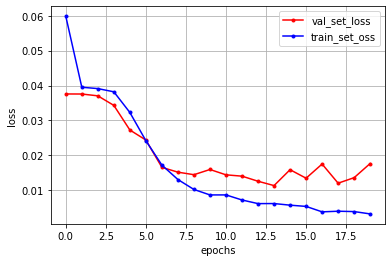

In [42]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

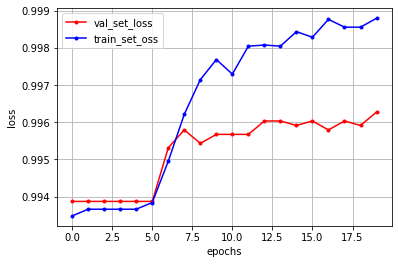

In [45]:
y_vloss = hist.history['val_accuracy']
y_loss = hist.history['accuracy']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()